# **Loan Prediction**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [3]:
df=pd.DataFrame(data=train)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
index = df. index
number_of_rows = len(index)
print(number_of_rows)

614


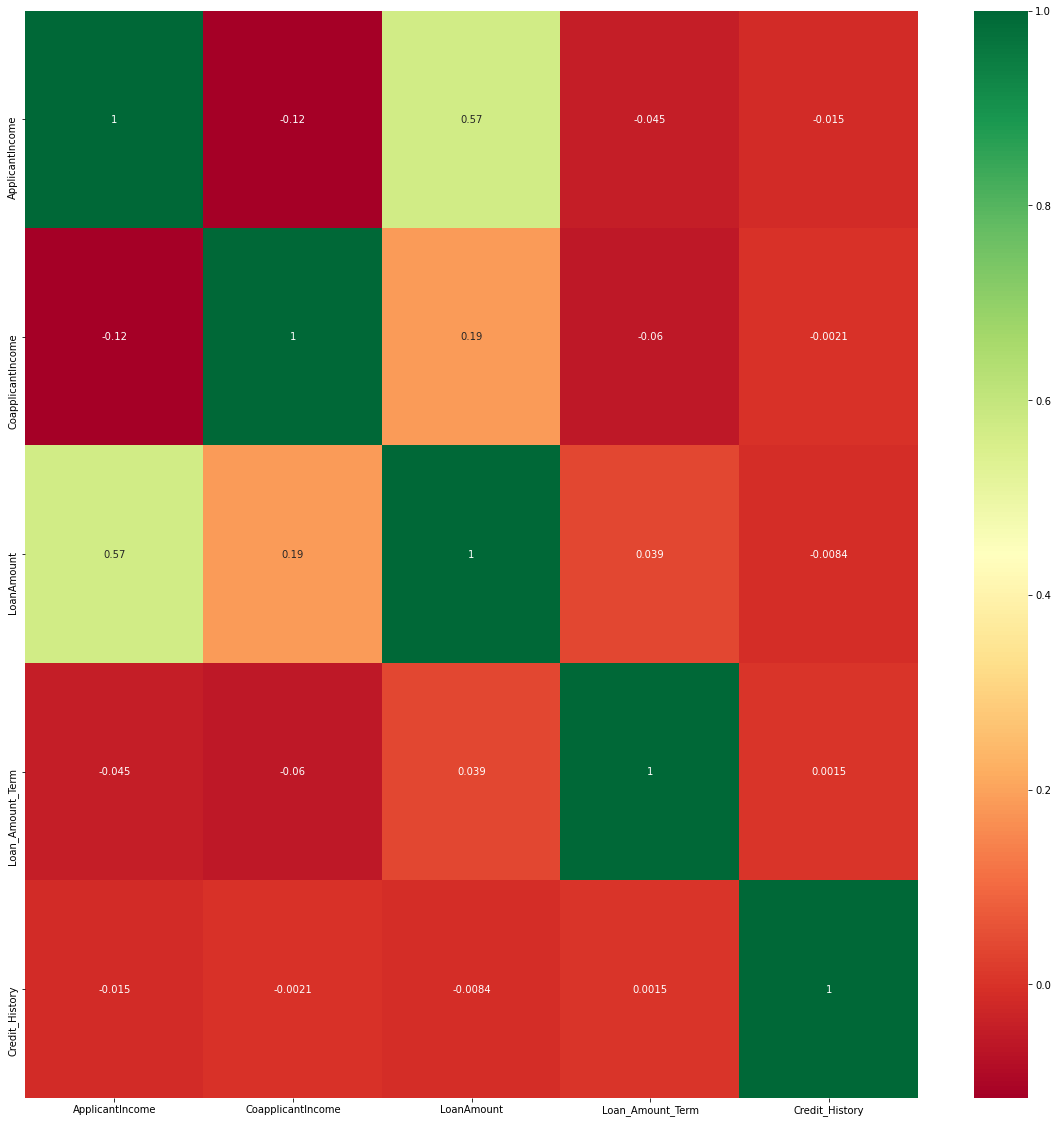

In [5]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:>

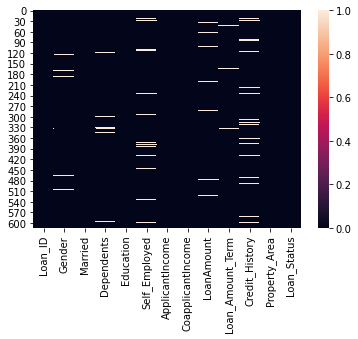

In [7]:
sns.heatmap(df.isnull())

In [8]:
df["Gender"].mode()


0    Male
dtype: object

In [9]:
df["Gender"].fillna("Male",inplace=True)

In [10]:
df["Married"].mode()

0    Yes
dtype: object

In [11]:
df["Married"].fillna("Yes",inplace=True)

In [12]:
df["Self_Employed"].mode()



0    No
dtype: object

In [13]:
df["Self_Employed"].fillna("No",inplace=True)

In [14]:
m=df["LoanAmount"].median()

In [15]:

df["LoanAmount"].fillna(m,inplace=True)


In [16]:
df["Loan_Amount_Term"].mode()

0    360.0
dtype: float64

In [17]:

df["Loan_Amount_Term"].fillna(360.0,inplace=True)


In [18]:
df["Credit_History"].mode()


0    1.0
dtype: float64

In [19]:
df["Credit_History"].fillna(1.0,inplace=True)

In [20]:
df.Dependents.fillna("0",inplace=True)

In [21]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
depend  = {'1': 1,'0':0,'2':2,'3+':3} 
df.Dependents = [depend[item] for item in df.Dependents] 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df["Dependents"].mode()

0    0
dtype: int64

In [24]:
#df.dropna(axis=0,inplace=True)


<AxesSubplot:>

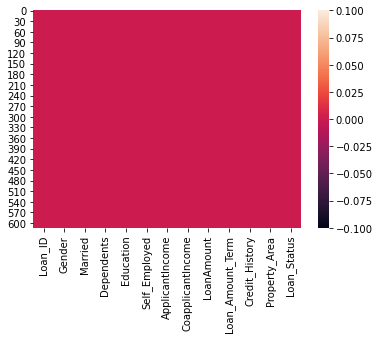

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.drop('Loan_ID',inplace=True,axis=1)
#df.drop('Dependents',inplace=True,axis=1)


In [27]:
approval  = {'Y': 1,'N':0} 
df.Loan_Status = [approval[item] for item in df.Loan_Status] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [28]:
gender  = {'Female': 1,'Male':0} 
df.Gender = [gender[item] for item in df.Gender] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [29]:
married  = {'Yes': 1,'No':0} 
df.Married = [married[item] for item in df.Married] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [30]:
education = {'Graduate': 1,'Not Graduate':0} 
df.Education = [education[item] for item in df.Education] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [31]:
prop = {'Rural': 0,'Urban':2,'Semiurban':1} 
df.Property_Area = [prop[item] for item in df.Property_Area] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,No,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,2,1


In [32]:
selfemp = {'Yes': 1,'No':0} 
df.Self_Employed = [selfemp[item] for item in df.Self_Employed] 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
fea_normalize=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']

In [34]:
for fea in fea_normalize:
    df[fea]=(df[fea])/(df[fea].max())

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.000000,1,0,0.072210,0.000000,0.182857,0.75,1.0,1.0,1
1,0,1,0.333333,1,0,0.056580,0.036192,0.182857,0.75,1.0,0.0,0
2,0,1,0.000000,1,1,0.037037,0.000000,0.094286,0.75,1.0,1.0,1
3,0,1,0.000000,0,0,0.031889,0.056592,0.171429,0.75,1.0,1.0,1
4,0,0,0.000000,1,0,0.074074,0.000000,0.201429,0.75,1.0,1.0,1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Loan_Status',axis=1,inplace=False), df['Loan_Status'], test_size=0.8, random_state=43)

In [37]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,0,1,0.000000,1,0,0.058642,0.055992,0.185714,0.750,1.0,1.0
373,0,0,0.333333,1,0,0.037802,0.047688,0.158571,0.375,0.0,1.0
278,0,1,0.000000,1,0,0.180037,0.000000,0.622857,0.750,1.0,0.5
435,1,1,0.000000,1,0,0.124037,0.000000,0.182857,0.500,1.0,0.5
241,0,1,0.333333,0,0,0.030988,0.047592,0.200000,0.375,1.0,1.0


In [38]:
y_train.head()

362    1
373    0
278    1
435    1
241    0
Name: Loan_Status, dtype: int64

In [39]:
#df.dtypes

In [40]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'max_depth' : range(4,25),
    'min_samples_leaf' : range(20,200,10),
    'min_samples_split' : range(20,200,10),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

In [44]:
rd=RandomForestClassifier(random_state=np.random.randint(0,100))
grid = GridSearchCV(rd, param_grid, cv = n_folds, return_train_score=True,verbose=3)

In [45]:
#grid.fit(x_train,y_train)


In [46]:
#grid.best_params_

In [47]:
classifier=RandomForestClassifier(n_estimators=12,criterion='gini',random_state=43,max_features='auto',max_depth=7,min_samples_leaf=7,min_samples_split=20)
classifier.fit(x_train,y_train)
preds=classifier.predict(x_test)

In [48]:
accuracy=accuracy_score(y_test,preds)
accuracy

0.766260162601626

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
best_tree=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=20,min_samples_split=80,random_state=np.random.randint(0,100))
best_tree.fit(x_train,y_train)
y_pred_best=best_tree.predict(x_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred_best)
accuracy

0.8150406504065041

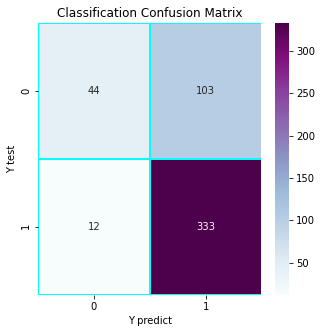

In [52]:
cfm=confusion_matrix(y_test,preds)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cfm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [53]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<AxesSubplot:>

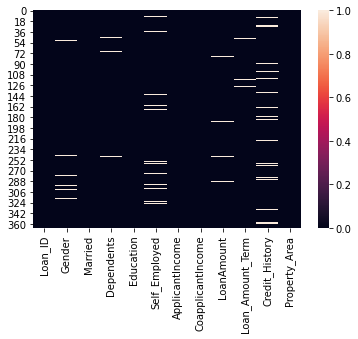

In [54]:
sns.heatmap(test.isnull())

In [55]:
test.Dependents.fillna("0",inplace=True)
depend  = {'1': 1,'0':0,'2':2,'3+':3} 
test.Dependents = [depend[item] for item in test.Dependents] 
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
test["Gender"].mode()

0    Male
dtype: object

In [57]:
test["Gender"].fillna("Male",inplace=True)

In [58]:
test["Self_Employed"].mode()

0    No
dtype: object

In [59]:
test["Self_Employed"].fillna("No",inplace=True)

In [60]:
m=test["LoanAmount"].median()
m

125.0

In [61]:
test["LoanAmount"].fillna(m,inplace=True)

In [62]:
test["Loan_Amount_Term"].mode()

0    360.0
dtype: float64

In [63]:
test["Loan_Amount_Term"].fillna(360.0,inplace=True)

In [64]:
test["Credit_History"].mode()

0    1.0
dtype: float64

In [65]:
test["Credit_History"].fillna(1.0,inplace=True)

<AxesSubplot:>

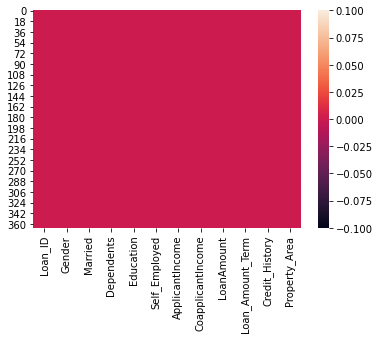

In [66]:
sns.heatmap(test.isnull())

In [67]:
#test.dropna(axis=0,inplace=True)

In [68]:
test2=test.drop("Loan_ID",axis=1,inplace=False)
test2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
selfemp = {'Yes': 1,'No':0} 
test2.Self_Employed = [selfemp[item] for item in test2.Self_Employed] 
#test2.head()

In [70]:
prop = {'Rural': 0,'Urban':2,'Semiurban':1} 
test2.Property_Area = [prop[item] for item in test2.Property_Area] 
#test2.head()

In [71]:
education = {'Graduate': 1,'Not Graduate':0} 
test2.Education = [education[item] for item in test2.Education] 
#test2.head()

In [72]:
married  = {'Yes': 1,'No':0} 
test2.Married = [married[item] for item in test2.Married] 
#test2.head()

In [73]:
gender  = {'Female': 1,'Male':0} 
test2.Gender = [gender[item] for item in test2.Gender] 
#test2.head()

In [74]:
preds=best_tree.predict(test2)

In [75]:
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [76]:
loan  = {1: 'Y',0:'N'} 
preds = [loan[item] for item in preds] 
#preds

In [77]:
test3=pd.DataFrame()
test3["Loan_ID"]=test["Loan_ID"]

In [78]:
test3["Loan_Status"]=preds

In [79]:
test3.to_csv('submitfinal.csv', index=False)

In [80]:
import pickle
# open a file, where you ant to store the data
file = open('loan_approval_decision_tree_classifier.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)
